# With original data deleted for  missing information
In this version there will be no visualisation just jump straightaway into training the model.

Time series forecasting can broadly be categorized into the following categories:

    Classical / Statistical Models — Moving Averages, Exponential smoothing, ARIMA, SARIMA, TBATS

    Machine Learning — Linear Regression, XGBoost, Random Forest, or any ML model with reduction methods

Deep Learning — RNN, LSTM

This project is focused on the second category i.e. Machine Learning.

# 3. Data Representation 

## Importing Python Libraries and Time Series Data from excel files

In [1]:
# Import various Python libraries

import numpy as np
import seaborn as sns
import pandas as pd

# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

# Set-up to have matplotlib use its support for notebook inline plots
sns.set()
%matplotlib inline

In [2]:
# Reading the dataset
audusd = pd.read_excel('C:/Users/DELL/Downloads/Merged Data_Edited.xlsx')

# for dropping the column USDX and renamed audusd2
# audusd2 = audusd.drop(['USDX'], axis=1)

audusd

,Date,AUDUSD_Close,US_bond_2Yr,Aus_bond_2Yr,ASX200,SP500,USDX,IRD
0,2011-01-02,1.02120,0.61,5.100,4742.5,127.05,79.13,4.490
1,2011-01-03,1.01665,0.61,5.100,4742.5,127.05,79.13,4.490
2,2011-01-04,1.00691,0.63,5.100,4742.5,126.98,79.44,4.470
3,2011-01-05,0.99974,0.71,5.030,4714.9,127.64,80.26,4.320
4,2011-01-06,0.99287,0.68,5.040,4725.0,127.39,80.79,4.360
...,...,...,...,...,...,...,...,...
3123,2020-12-27,0.76100,0.13,0.080,6664.8,369.00,90.32,-0.050
3124,2020-12-28,0.75871,0.13,0.080,6664.8,372.17,90.34,-0.050
3125,2020-12-29,0.76097,0.12,0.075,6700.3,371.46,89.99,-0.045
3126,2020-12-30,0.76874,0.12,0.080,6682.4,371.99,89.68,-0.040


PyCaret is simple and easy to use. All the operations performed in PyCaret are sequentially stored in a Pipeline that is fully automated for deployment. Whether it's imputing missing values, one-hot-encoding, transforming categorical data, feature engineering, or even hyperparameter tuning, PyCaret automates all of it.  So in this database there is 685 samples with missing data and we will experiment with Pycaret dealing with missing value.

In addition Pycaret Regression module default settings are not ideal for time series data because it involves few data preparatory steps that are not valid for ordered data (data with a sequence such as time series data).  Therefore below, we'll need to turn the 'Date' column into 3 other columns that Pycaret will recognise. 

In [3]:
# extract month and year from dates
audusd['Month'] = audusd['Date'].dt.month
audusd['Year'] = audusd['Date'].dt.year

# create a sequence of numbers
audusd['Series'] = np.arange(1,len(audusd)+1)

# drop unnecessary columns and re-arrange
audusd.drop(['Date'], axis=1, inplace=True)
audusd = audusd[['Series', 'Year', 'Month', 'AUDUSD_Close', 'US_bond_2Yr', 'Aus_bond_2Yr', 'ASX200', 'SP500', 'USDX', 'IRD']] 

# check the head of the dataset
audusd

,Series,Year,Month,AUDUSD_Close,US_bond_2Yr,Aus_bond_2Yr,ASX200,SP500,USDX,IRD
0,1,2011,1,1.02120,0.61,5.100,4742.5,127.05,79.13,4.490
1,2,2011,1,1.01665,0.61,5.100,4742.5,127.05,79.13,4.490
2,3,2011,1,1.00691,0.63,5.100,4742.5,126.98,79.44,4.470
3,4,2011,1,0.99974,0.71,5.030,4714.9,127.64,80.26,4.320
4,5,2011,1,0.99287,0.68,5.040,4725.0,127.39,80.79,4.360
...,...,...,...,...,...,...,...,...,...,...
3123,3124,2020,12,0.76100,0.13,0.080,6664.8,369.00,90.32,-0.050
3124,3125,2020,12,0.75871,0.13,0.080,6664.8,372.17,90.34,-0.050
3125,3126,2020,12,0.76097,0.12,0.075,6700.3,371.46,89.99,-0.045
3126,3127,2020,12,0.76874,0.12,0.080,6682.4,371.99,89.68,-0.040


## 5. Train Data Models / 6. Validate Data Models

In [4]:
# Data period: from Jan 1, 2011 to Dec 31, 2020

# Install a pip package in the current Jupyter kernel.  If not Pycaret won't be able to install
import sys
!{sys.executable} -m pip install numpy

# Installing PyCaret in Local Jupyter Notebook
!pip install pycaret

# Installing PyCaret on Google Colab or Azure Notebooks
# !pip install pycaret
# If you are running this notebook on Google colab, run the following code at top of your notebook to display interactive visuals.
# from pycaret.utils import enable_colab
# enable_colab()

PyCaret’s Regression module default settings are not ideal for time series data because it involves few data preparatory steps that are not valid for ordered data (data with a sequence such as time series data).  For example, the split of the dataset into train and test set is done randomly with shuffling. This wouldn’t make sense for time series data as you don’t want the recent dates to be included in the training set whereas historical dates are part of the test set.

In order to demonstrate the predict_model() function on unseen data, a sample of 245 records has been withheld 
from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular 
split is performed to simulate a real life scenario. Another way to think about this is that these 314 records are not 
available at the time when the machine learning experiment was performed.

In [5]:
# split data into train-test set
audusd_train = audusd[audusd['Year'] < 2020]
audusd_test = audusd[audusd['Year'] >= 2020]

print('Data for Modeling: ' + str(audusd_train.shape))
print('Unseen Data For Predictions: ' + str(audusd_test.shape))

Data for Modeling: (2814, 10)
Unseen Data For Predictions: (314, 10)


# Setting up Environment in PyCaret
The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe ('audusd') and the name of the target column('AUDUSD_Close'). All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

Time-series data also requires a different kind of cross-validation since it needs to respect the order of dates. PyCaret regression module by default uses k-fold random cross-validation when evaluating models. The default cross-validation setting is not suitable for time-series data.

In [6]:
from pycaret.regression import *

# initialize setup
reg = setup(data = audusd_train, test_data = audusd_test, target='AUDUSD_Close', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,AUDUSD_Close
2,Original Data,"(2814, 10)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2814, 20)"


# Comparing Different Models
There are numerous regression algorithms available, and it is not always obvious which one is optimal for our dataset. The only way to find the best model is to test a number of them and compare the results. Fortunately, PyCaret provides the compare_models() function, which compares a variety of different models easily.

After running the compare_models() function, the results are displayed. This table may seem intimidating, but it's actually fairly simple to understand. Two simple words of code (not even a line) have created over 22 models using 10 fold cross validation and evaluated the 6 most commonly use regression metrics (MAE, MSE, RMSE, R2, RMSLE and MAPE). The first column contains each model's name, and the rest of the columns are various metrics.

For time series, Stationary R-squared is preferable to ordinary R-squared when there are trends or seasonal patterns. In order to select the best fit model, the model with the lowest MAE or RMSE value should be selected.

In [7]:
best = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0722,0.0094,0.0813,-2.0559,0.0439,0.0905,0.1400
lightgbm,Light Gradient Boosting Machine,0.0722,0.0094,0.0812,-2.0213,0.0438,0.0907,0.2067
et,Extra Trees Regressor,0.0733,0.0096,0.0832,-2.2385,0.0449,0.0920,0.1600
rf,Random Forest Regressor,0.0745,0.0099,0.0843,-2.2961,0.0455,0.0939,0.8767
knn,K Neighbors Regressor,0.0759,0.0102,0.0881,-2.9383,0.0476,0.0953,0.9367
dt,Decision Tree Regressor,0.0771,0.0100,0.0873,-2.7340,0.0474,0.0979,0.7767
ada,AdaBoost Regressor,0.0784,0.0106,0.0879,-2.9375,0.0473,0.0984,0.0833
par,Passive Aggressive Regressor,0.1388,0.0235,0.1486,-12.7557,0.0822,0.1779,0.9667
llar,Lasso Least Angle Regression,0.1792,0.0357,0.1861,-35.9590,0.1001,0.2355,0.9900


The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using R2 (highest to lowest) which can be changed by passing sort parameter. For example compare_models(sort = 'RMSLE') will sort the grid by RMSLE (lower to higher since lower is better). If you want to change the fold parameter from the default value of 10 to a different value then you can use the fold parameter. For example compare_models(fold = 5) will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time.

We are focusing on RMSE for now, which stands for Root Mean Squared Error. RMSE is a widely used metric for regression, and it is defined as the square root of the averaged squared difference between the actual value and the one predicted by the model.

The lower the RMSE value, the more accurate our model is. In this case, the best model is the Extra Trees Regressor model, with an RMSE value of 0.0716 (Compared to our previous attempt of 0.0057).

In [8]:
model = create_model('et', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1405,0.0243,0.1559,-4.0056,0.0809,0.1652
1,0.0298,0.0015,0.0384,-1.3135,0.0219,0.0410
2,0.0495,0.0031,0.0554,-1.3964,0.0320,0.0700
Mean,0.0733,0.0096,0.0832,-2.2385,0.0449,0.0920
SD,0.0482,0.0104,0.0518,1.2500,0.0258,0.0531


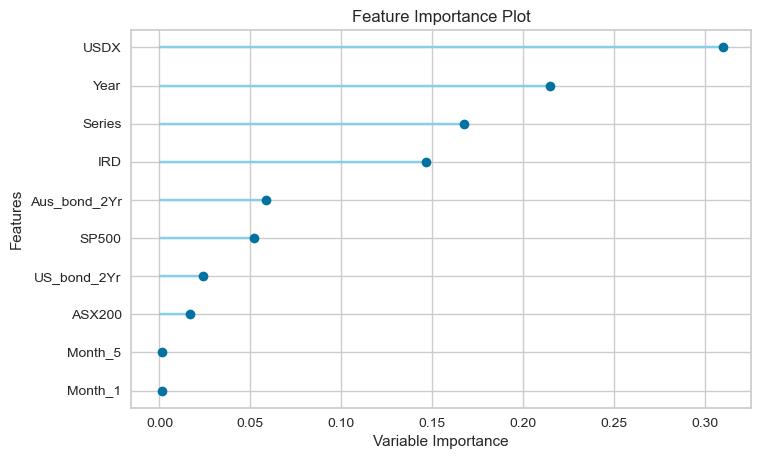

In [9]:
plot_model(model, plot='feature')

In [10]:
evaluate_model(model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [11]:
prediction_holdout = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0265,0.0012,0.0348,0.2842,0.0208,0.0395


In [12]:
test = predict_model(model, audusd_test)
test.head()

,Series,Year,Month,AUDUSD_Close,US_bond_2Yr,Aus_bond_2Yr,ASX200,SP500,USDX,IRD,Label
2814,2815,2020,1,0.70182,1.58,0.920,6684.1,321.86,96.39,-0.660,0.699128
2815,2816,2020,1,0.69829,1.58,0.875,6690.6,324.87,96.85,-0.705,0.695134
2816,2817,2020,1,0.69456,1.53,0.825,6733.5,322.41,96.84,-0.705,0.691948
2817,2818,2020,1,0.69432,1.53,0.825,6733.5,322.41,96.84,-0.705,0.691948
2818,2819,2020,1,0.69364,1.54,0.795,6735.7,323.64,96.67,-0.745,0.689644


In [13]:
def plot_series(time, series,i, format="-", start=0, end=None):
    #plt.figure(figsize=(20,10))
    plt.plot(series[start:end], format,label=i)
    plt.xlabel("Series")
    plt.ylabel("AUDUSD_Close")
    plt.legend()

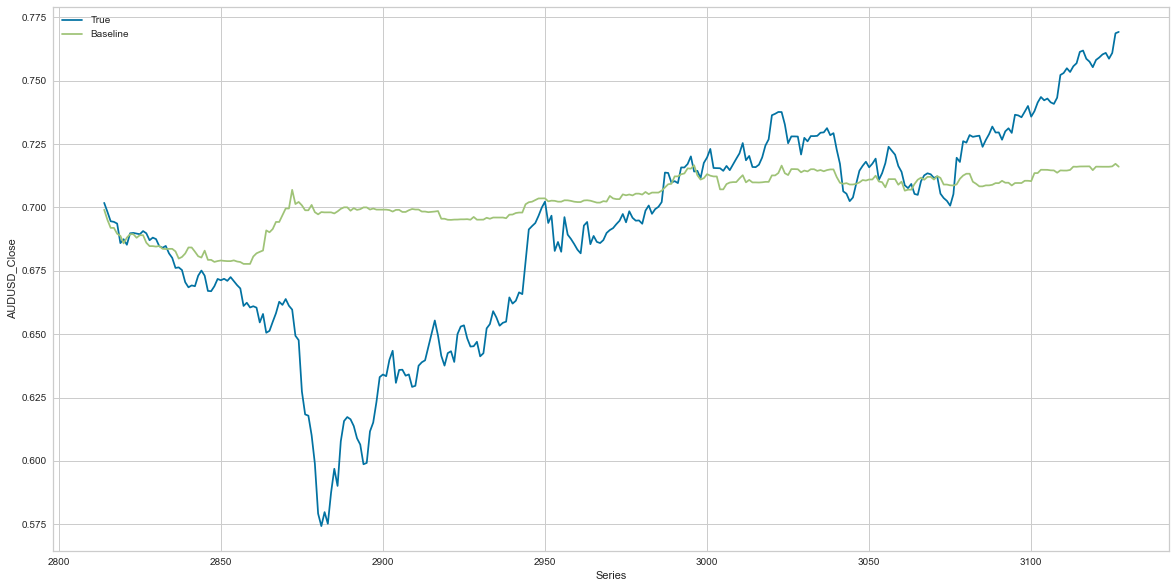

In [16]:
plt.figure(figsize=(20,10))
plot_series(audusd_test.index, audusd_test['AUDUSD_Close'],"True")
#plot_series(train['ds'],train['y'])
plot_series(audusd_test.index, test['Label'],"Baseline")

## Making Predictions on New Data
Every real-world machine learning project's ultimate goal is to make predictions on new data, where the target variable is unknown. You can accomplish that by using the predict_model() function, which returns a pandas dataframe with predictions.

We are going to create an entirely random dataset in the recent quarter of 2021, of sample size 20 and test our model and see how it predicts AUDUSD prices.

In [19]:
# Reading the dataset
audusd3 = pd.read_excel('C:/Users/DELL/Downloads/Data4Prediction.xlsx')

# extract month and year from dates
audusd3['Month'] = audusd3['Date'].dt.month
audusd3['Year'] = audusd3['Date'].dt.year

# create a sequence of numbers
audusd3['Series'] = np.arange(1,len(audusd3)+1)

# drop unnecessary columns and re-arrange
audusd3.drop(['Date'], axis=1, inplace=True)
audusd3 = audusd3[['Series', 'Year', 'Month', 'AUDUSD_Close', 'US_bond_2Yr', 'Aus_bond_2Yr', 'ASX200', 'SP500', 'USDX', 'IRD']] 

# check the head of the dataset
audusd3.head()
# for dropping the column USDX and renamed audusd4
# audusd4 = audusd3.drop(['USDX'], axis=1)
# audusd4

,Series,Year,Month,AUDUSD_Close,US_bond_2Yr,Aus_bond_2Yr,ASX200,SP500,USDX,IRD
0,1,2021,1,0.77109,0.13,0.080,6684.2,368.79,89.87,-0.050
1,2,2021,1,0.76692,0.17,0.080,6684.2,368.79,89.87,-0.090
2,3,2021,1,0.77618,0.17,0.070,6681.9,371.33,89.44,-0.100
3,4,2021,1,0.78152,0.17,0.070,6607.1,373.55,89.53,-0.100
4,5,2021,1,0.77682,0.17,0.075,6712.0,379.10,89.83,-0.095


In [20]:
predict = predict_model(model, audusd3)
predict.head()

,Series,Year,Month,AUDUSD_Close,US_bond_2Yr,Aus_bond_2Yr,ASX200,SP500,USDX,IRD,Label
0,1,2021,1,0.77109,0.13,0.080,6684.2,368.79,89.87,-0.050,0.770871
1,2,2021,1,0.76692,0.17,0.080,6684.2,368.79,89.87,-0.090,0.771059
2,3,2021,1,0.77618,0.17,0.070,6681.9,371.33,89.44,-0.100,0.773591
3,4,2021,1,0.78152,0.17,0.070,6607.1,373.55,89.53,-0.100,0.773383
4,5,2021,1,0.77682,0.17,0.075,6712.0,379.10,89.83,-0.095,0.771237


In [21]:
def plot_series(time, series,i, format="-", start=0, end=None):
    #plt.figure(figsize=(20,10))
    plt.plot(series[start:end], format,label=i)
    plt.xlabel("Series")
    plt.ylabel("AUDUSD_Close")
    plt.legend()

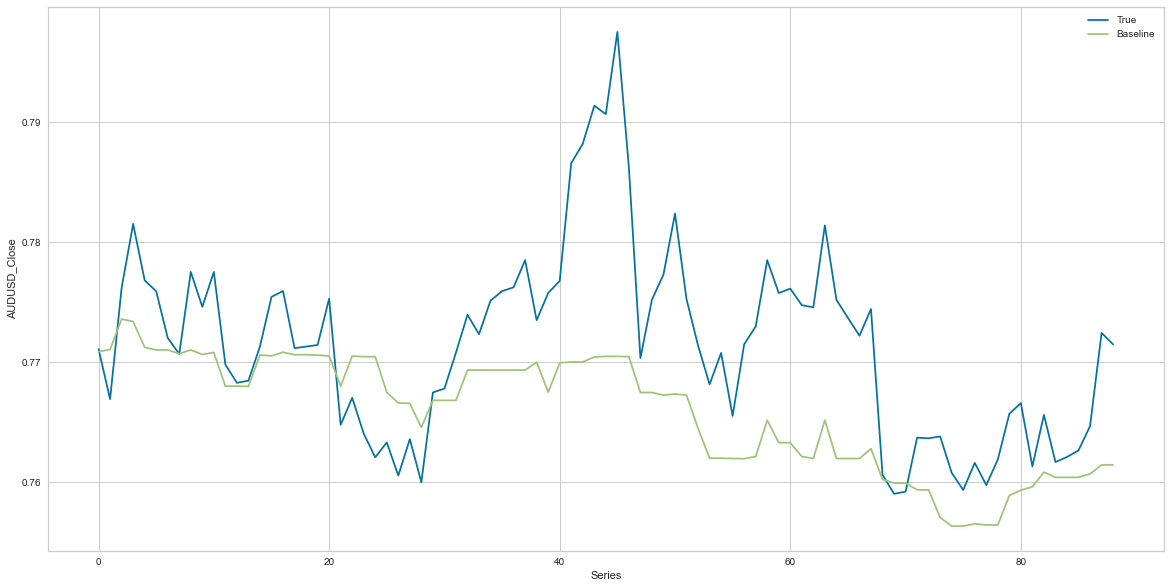

In [22]:
plt.figure(figsize=(20,10))
plot_series(audusd3.index, audusd3['AUDUSD_Close'],"True")
#plot_series(train['ds'],train['y'])
plot_series(audusd3.index, predict['Label'],"Baseline")

In [23]:
# df.to_csv(r'C:/Users/DELL/Downloads/test.csv', index = False)

# df_ap = df[['AUDUSD_Close','Label']]
# df_ap

# Interpreting the Model

The ability to interpret a machine learning model's results allows you to avoid relying on a "black box model," where you don't understand how it exactly works.

PyCaret includes the interpret_model() function that provides an interpretation plot for a given model. This function requires the SHAP (SHapley Additive exPlanations) library to work, so we'll have to install it first.

In [24]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


After installing the SHAP library, we can create an interpretation plot for our model. 

To interpret the model, we'll use the "reason" plot type:

In [25]:
etm = create_model('et', cross_validation=True, verbose=False)

interpret_model(etm, plot='reason', observation=32)

Above the plot, you'll notice the "base value," which is defined as the mean predicted target, and f(x), which is the prediction for a selected observation. The red-colored features increased the predicted value, while the blue-colored features decreased it.

The size of each feature indicates the impact it has on the model. 

# 7. Deploy Data Models

# 8. Environment Feedback